<a href="https://colab.research.google.com/github/etappau/Images/blob/master/Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Render out plots inline
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option("display.max_columns", None)
plt.rcParams['figure.figsize'] = (10, 5)

In [2]:
df = pd.read_csv('/content/MEDICARE_PROVIDER_CHARGE_INPATIENT_DRGALL_FY2017.CSV')
df.head()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,023 - CRANIOTOMY W MAJOR DEVICE IMPLANT OR ACU...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,28,117117.78570,25823.714290,24057.392860
1,025 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,32,98357.56250,20688.343750,19791.406250
2,027 - CRANIOTOMY & ENDOVASCULAR INTRACRANIAL P...,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,11,69153.54546,11811.181820,8194.363636
3,037 - EXTRACRANIAL PROCEDURES W MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,12,100427.33330,19134.000000,18154.000000
4,038 - EXTRACRANIAL PROCEDURES W CC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,17,58199.47059,8519.470588,6714.882353


In [0]:
df.columns

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region (HRR) Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')

In [0]:
df.shape

(196325, 12)

In [5]:
from collections import Counter
print(dict(Counter(df['Provider Name'].values).most_common(10)))

{'GOOD SAMARITAN HOSPITAL': 532, 'METHODIST HOSPITAL': 463, 'ST JOSEPH MEDICAL CENTER': 450, 'FLORIDA HOSPITAL': 388, 'SAINT FRANCIS MEDICAL CENTER': 386, 'NEW YORK-PRESBYTERIAN HOSPITAL': 382, 'COVENANT MEDICAL CENTER': 378, 'MEMORIAL MEDICAL CENTER': 355, 'MAYO CLINIC HOSPITAL ROCHESTER': 348, 'ST JOSEPH HOSPITAL': 344}


In [0]:
# We want to find out which DRG codes are most common across the country, so let's create a new column to store the total discharges for a DRG code
DRGgrouped = df.groupby('DRG Definition')
DRGgrouped.agg({'Total Discharges': np.sum}).sort_values(by=['Total Discharges'], ascending=0)[:10]



,Total Discharges
DRG Definition,
871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC,597736
470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC,510632
291 - HEART FAILURE & SHOCK W MCC,359442
190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC,215525
189 - PULMONARY EDEMA & RESPIRATORY FAILURE,165613
872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC,157851
"392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC",155843
690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC,138497
683 - RENAL FAILURE W CC,134011


In [0]:
# We want to find out which Providers are most common across the country, so let's create a new column to store the total discharges for a Provider
Providergrouped = df.groupby('Provider Name')
Providergrouped.agg({'Total Discharges': np.sum}).sort_values(by=['Total Discharges'], ascending=0)[:10]

,Total Discharges
Provider Name,
FLORIDA HOSPITAL,32924
METHODIST HOSPITAL,25581
NEW YORK-PRESBYTERIAN HOSPITAL,24030
"CHRISTIANA CARE HEALTH SERVICES, INC.",20924
MAYO CLINIC HOSPITAL ROCHESTER,20680
"BEAUMONT HOSPITAL, ROYAL OAK",19080
YALE-NEW HAVEN HOSPITAL,19027
METHODIST HEALTHCARE MEMPHIS HOSPITALS,18070
GOOD SAMARITAN HOSPITAL,18066


In [0]:
def plot_most_common(category):
    sns.set()
    bar_plot = dict(Counter(df[category].values).most_common(4))
    plt.bar(*zip(*bar_plot.items()))
    plt.title("Most common" + ' ' + category)
    plt.show()

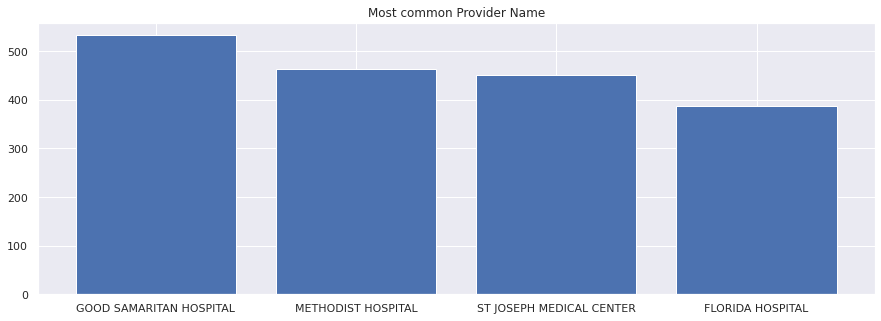

In [0]:
plot_most_common('Provider Name')

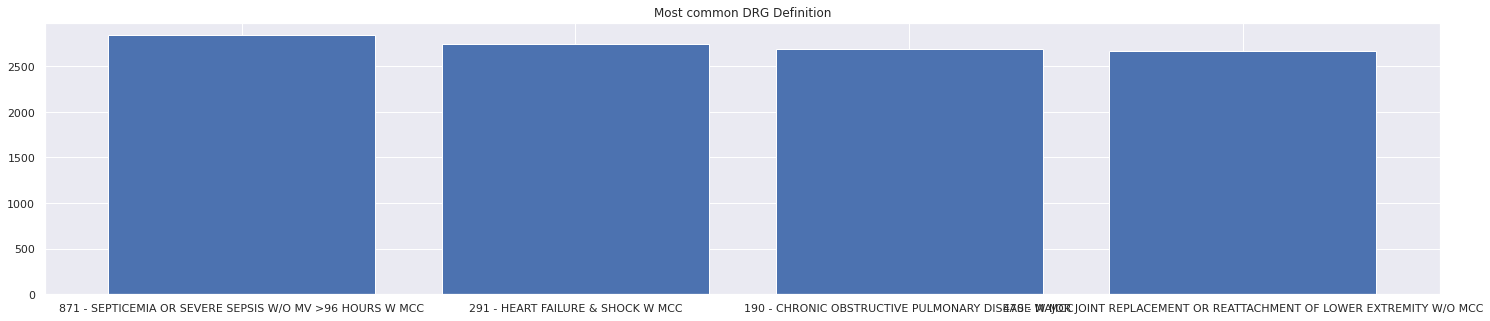

In [0]:
plot_most_common('DRG Definition')

In [0]:
def get_boxplot_of_categories(data_frame, categorical_column, numerical_column, limit):
    keys = []
    for i in dict(Counter(df[categorical_column].values).most_common(limit)):
        keys.append(i)
    print(keys)
    
    df_new = df[df[categorical_column].isin(keys)]
    sns.boxplot(x = df_new[categorical_column], y = df_new[numerical_column])

['GOOD SAMARITAN HOSPITAL', 'METHODIST HOSPITAL', 'ST JOSEPH MEDICAL CENTER', 'FLORIDA HOSPITAL', 'SAINT FRANCIS MEDICAL CENTER']


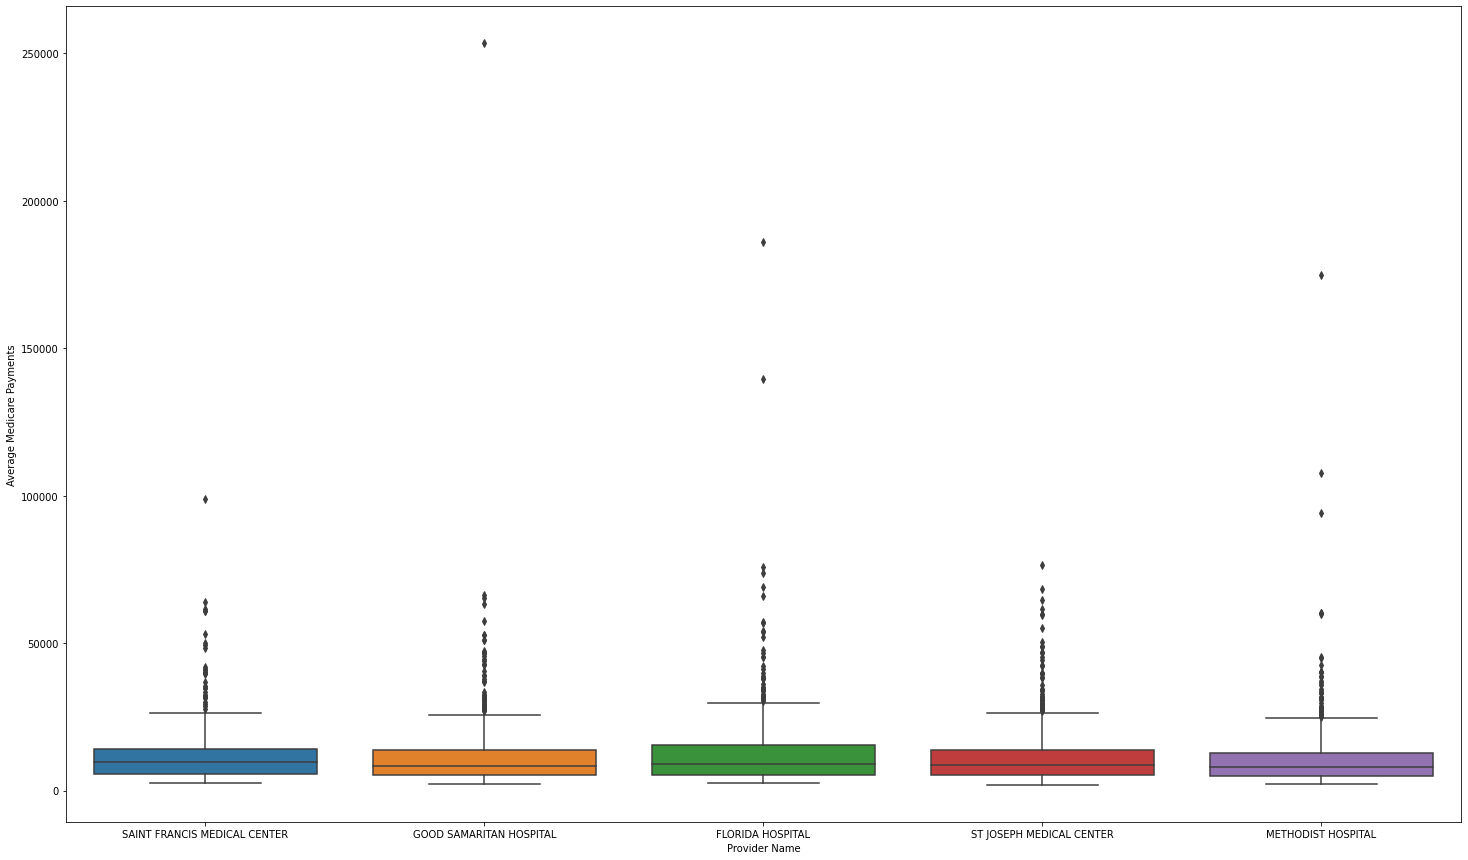

In [8]:
get_boxplot_of_categories(df, 'Provider Name', 'Average Medicare Payments', 5)

['GOOD SAMARITAN HOSPITAL', 'METHODIST HOSPITAL', 'ST JOSEPH MEDICAL CENTER', 'FLORIDA HOSPITAL', 'SAINT FRANCIS MEDICAL CENTER']


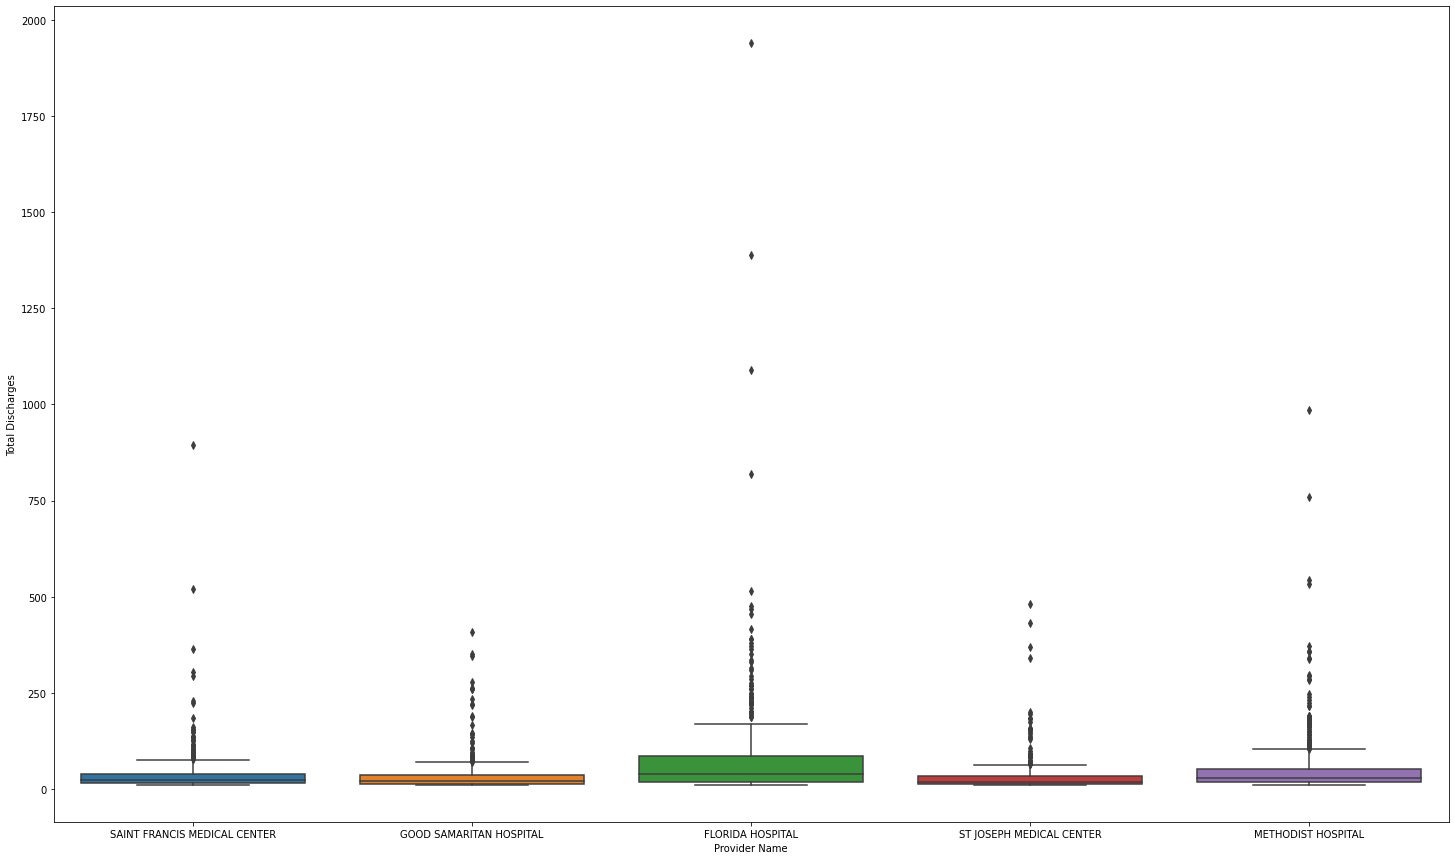

In [9]:
get_boxplot_of_categories(df, 'Provider Name', 'Total Discharges', 5)

['871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC', '291 - HEART FAILURE & SHOCK W MCC', '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC', '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC']


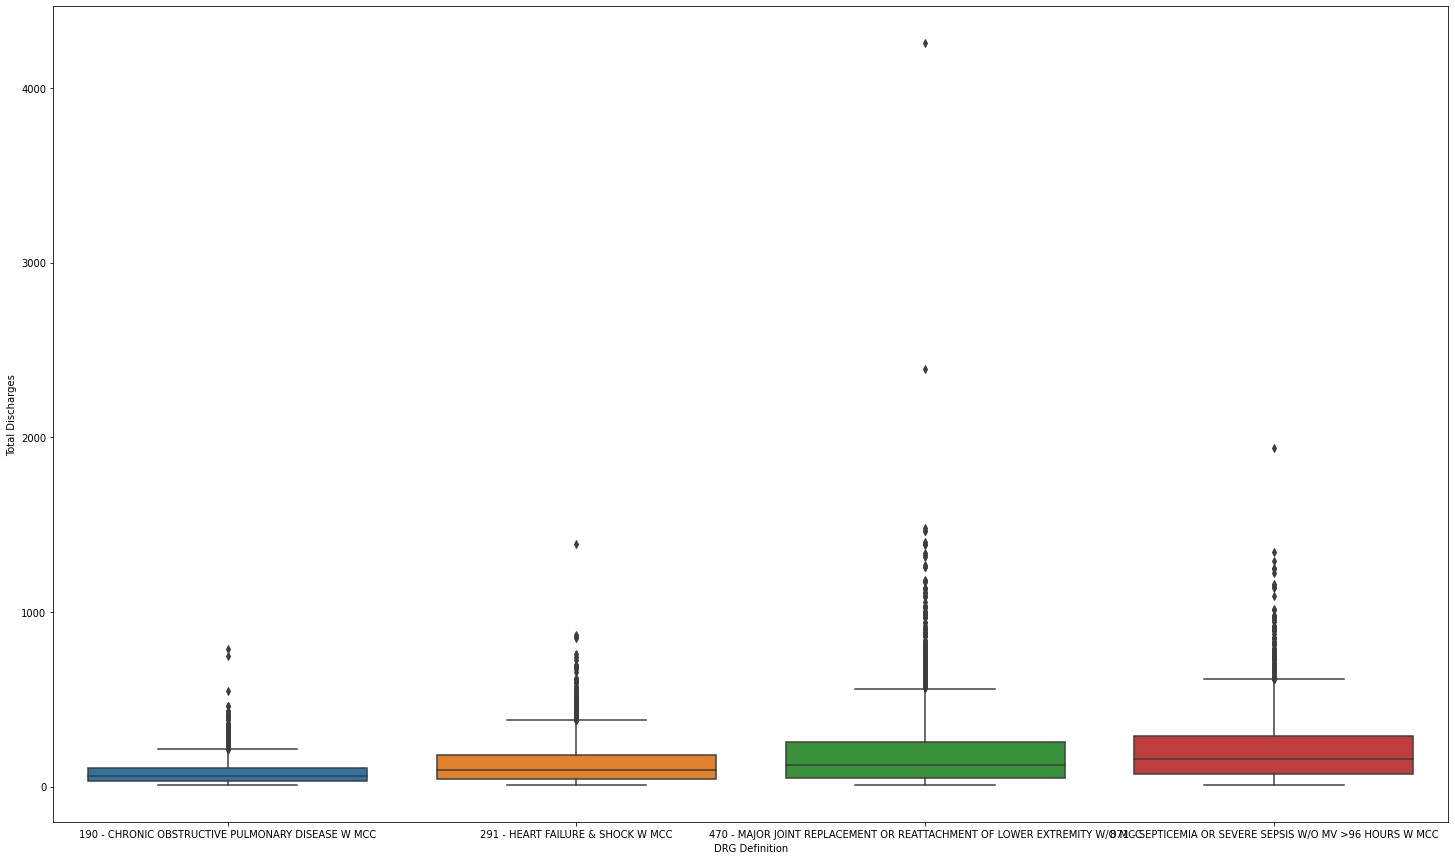

In [12]:
get_boxplot_of_categories(df, 'DRG Definition', 'Total Discharges', 4)

['871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC', '291 - HEART FAILURE & SHOCK W MCC', '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC', '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC']


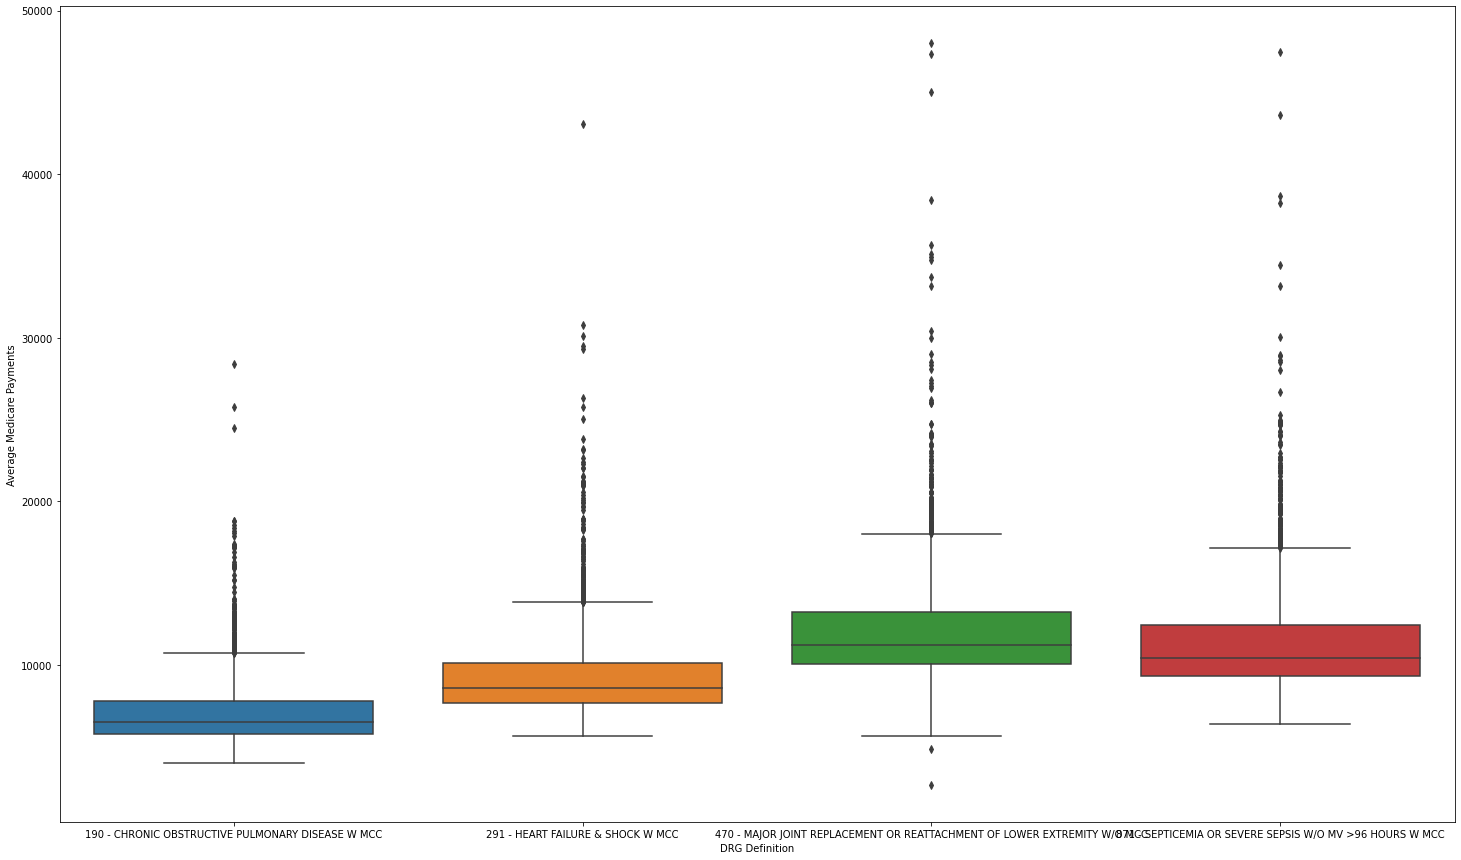

In [13]:
get_boxplot_of_categories(df, 'DRG Definition', 'Average Medicare Payments', 4)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
def get_scatter_plot_category(data_frame, categorical_column, categorical_value, numerical_column_one, numerical_column_two):
    df_new = data_frame[data_frame[categorical_column] == categorical_value]
    sns.set()
    plt.scatter(x= df_new[numerical_column_one], y = df_new[numerical_column_two])
    plt.xlabel(numerical_column_one)
    plt.ylabel(numerical_column_two)
    plt.title("Payments vs Discharge breakdown of" + " " + categorical_value)

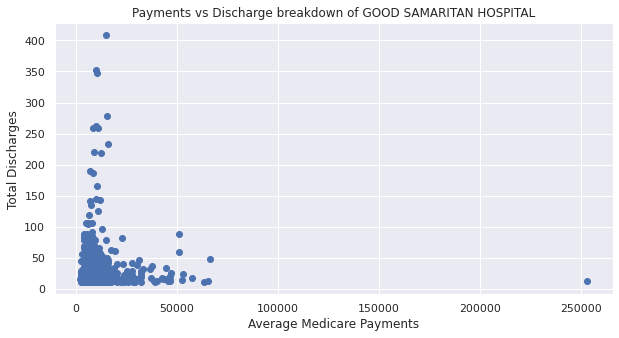

In [17]:
get_scatter_plot_category(df, 'Provider Name', 'GOOD SAMARITAN HOSPITAL', 'Average Medicare Payments', 'Total Discharges')

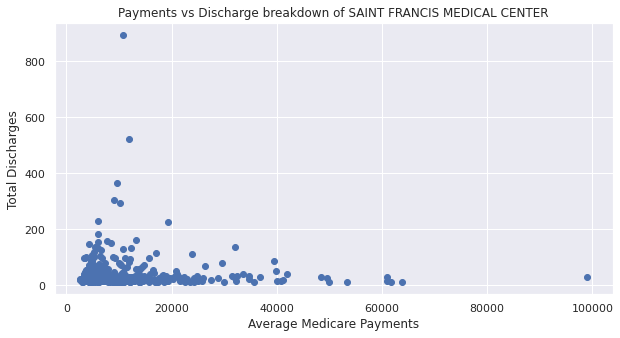

In [18]:
get_scatter_plot_category(df, 'Provider Name', 'SAINT FRANCIS MEDICAL CENTER', 'Average Medicare Payments', 'Total Discharges')

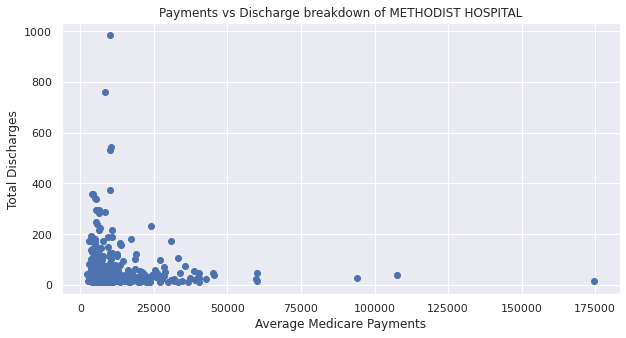

In [19]:
get_scatter_plot_category(df, 'Provider Name', 'METHODIST HOSPITAL', 'Average Medicare Payments', 'Total Discharges')

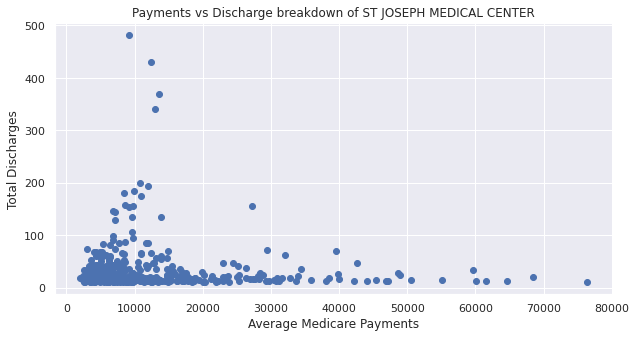

In [21]:
get_scatter_plot_category(df, 'Provider Name', 'ST JOSEPH MEDICAL CENTER', 'Average Medicare Payments', 'Total Discharges')

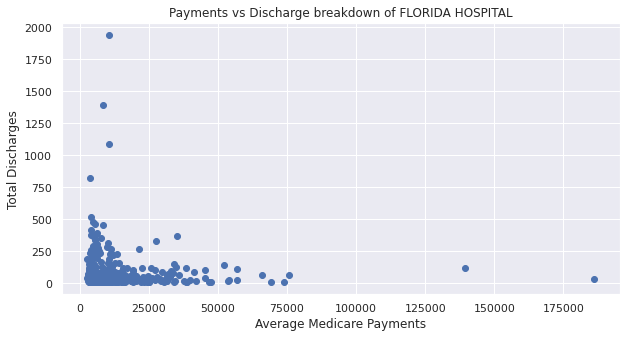

In [22]:
get_scatter_plot_category(df, 'Provider Name', 'FLORIDA HOSPITAL', 'Average Medicare Payments', 'Total Discharges')

In [0]:
print(dict(Counter(df['DRG Definition'].values).most_common(10)))

{'871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC': 2838, '291 - HEART FAILURE & SHOCK W MCC': 2742, '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC': 2687, '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC': 2666, '872 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W/O MCC': 2632, '392 - ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC': 2586, '690 - KIDNEY & URINARY TRACT INFECTIONS W/O MCC': 2584, '194 - SIMPLE PNEUMONIA & PLEURISY W CC': 2517, '189 - PULMONARY EDEMA & RESPIRATORY FAILURE': 2465, '603 - CELLULITIS W/O MCC': 2464}


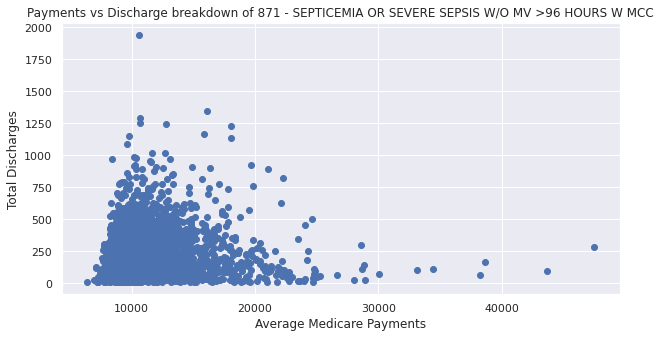

In [27]:
get_scatter_plot_category(df, 'DRG Definition', '871 - SEPTICEMIA OR SEVERE SEPSIS W/O MV >96 HOURS W MCC', 'Average Medicare Payments', 'Total Discharges')

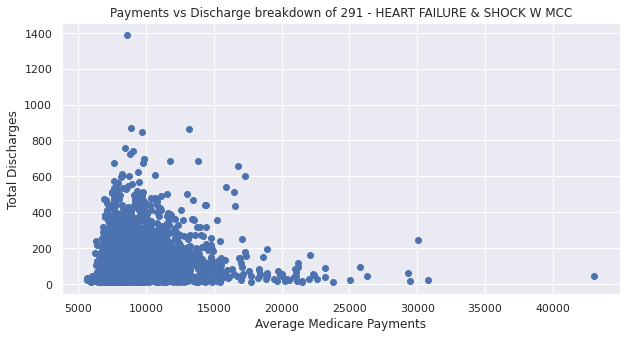

In [24]:
get_scatter_plot_category(df, 'DRG Definition', '291 - HEART FAILURE & SHOCK W MCC', 'Average Medicare Payments', 'Total Discharges')

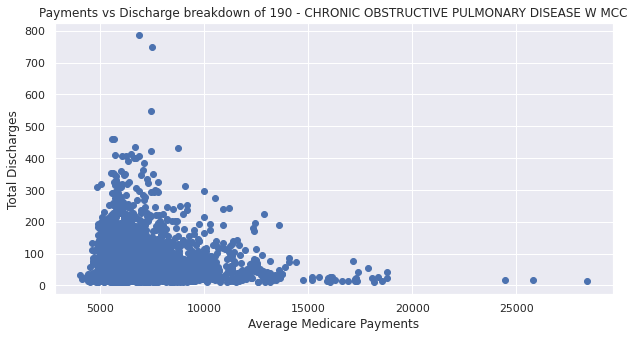

In [25]:
get_scatter_plot_category(df, 'DRG Definition', '190 - CHRONIC OBSTRUCTIVE PULMONARY DISEASE W MCC', 'Average Medicare Payments', 'Total Discharges')

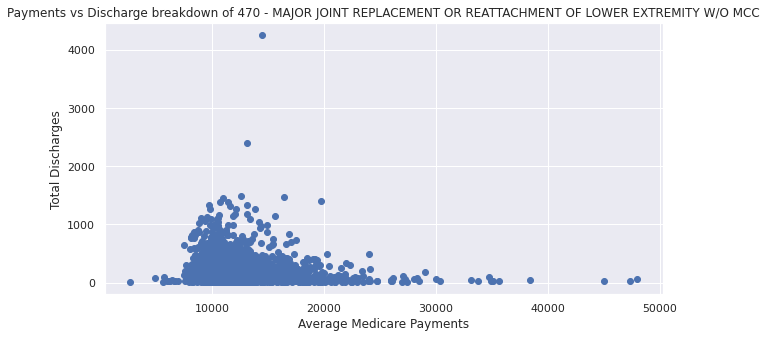

In [26]:
get_scatter_plot_category(df, 'DRG Definition', '470 - MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC', 'Average Medicare Payments', 'Total Discharges')

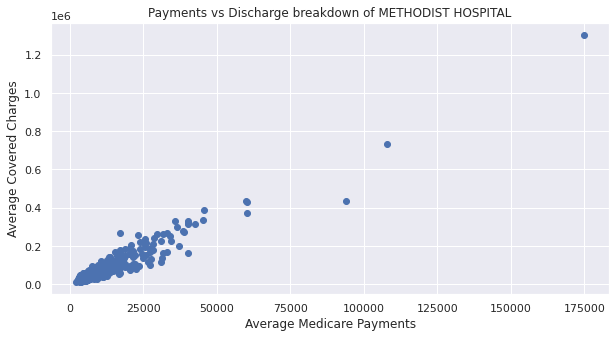

In [30]:
get_scatter_plot_category(df, 'Provider Name', 'METHODIST HOSPITAL', 'Average Medicare Payments', 'Average Covered Charges')

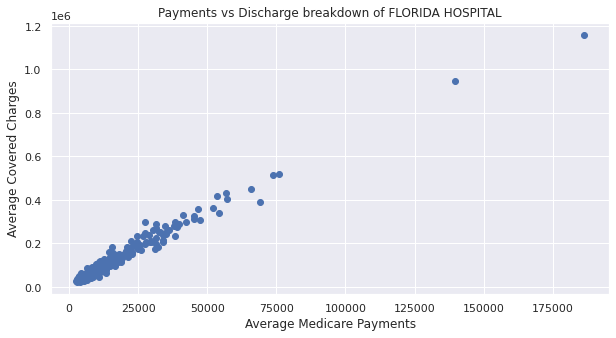

In [32]:
get_scatter_plot_category(df, 'Provider Name', 'FLORIDA HOSPITAL', 'Average Medicare Payments', 'Average Covered Charges')

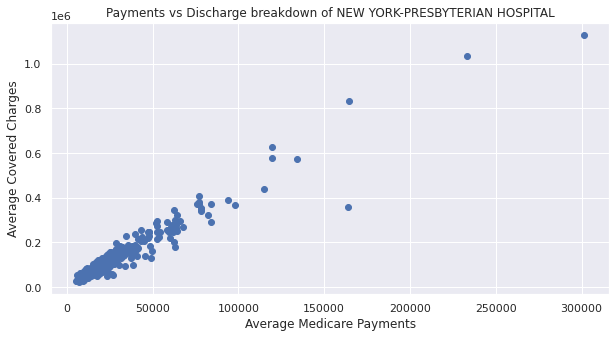

In [33]:
get_scatter_plot_category(df, 'Provider Name', 'NEW YORK-PRESBYTERIAN HOSPITAL', 'Average Medicare Payments', 'Average Covered Charges')

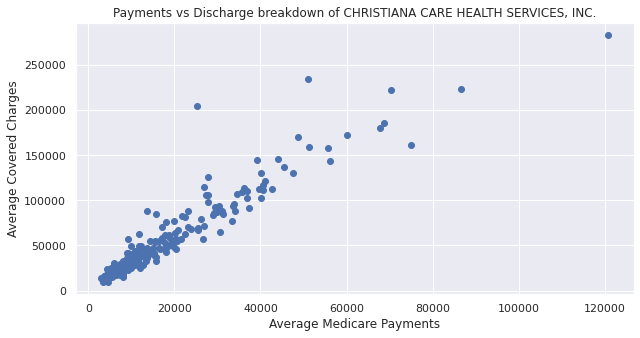

In [34]:
get_scatter_plot_category(df, 'Provider Name', 'CHRISTIANA CARE HEALTH SERVICES, INC.', 'Average Medicare Payments', 'Average Covered Charges')

In [0]:
!pip install pytrends

  Created wheel for pytrends: filename=pytrends-4.7.2-cp36-none-any.whl size=14261 sha256=3de3655755ef8d9d9fa8a5442e6275576b0903ea3b3eb6f486ffb63fc05efe35
  Stored in directory: /root/.cache/pip/wheels/64/ae/af/51d48fbbca0563036c6f80999b7ce3f097fa591fd165047baf
Successfully built pytrends


            Coronavirus  isPartial
date                              
2020-02-01           10      False
2020-02-02           10      False
2020-02-03           10      False
2020-02-04            8      False
2020-02-05            7      False
            Coronavirus  isPartial
date                              
2020-02-01           16      False
2020-02-02           13      False
2020-02-03            9      False
2020-02-04            8      False
2020-02-05            6      False
            Coronavirus  isPartial
date                              
2020-02-01           15      False
2020-02-02           11      False
2020-02-03           11      False
2020-02-04            9      False
2020-02-05            9      False


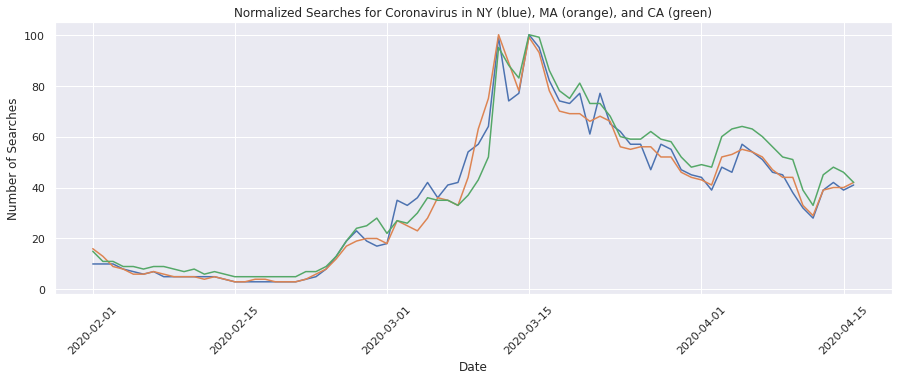

In [0]:
from pytrends.request import TrendReq

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 


def get_searches(key_word, state):
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload([key_word], cat=0, timeframe='2020-02-01 2020-04-16',  gprop='',geo='US-{}'.format(state))    
    df = pytrends.interest_over_time()
            
    
    print(df.head())
    
    sns.set()
    df['timestamp'] = pd.to_datetime(df.index)
    sns.lineplot(df['timestamp'], df[key_word])
    
    plt.title("Normalized Searches for Coronavirus in NY (blue), MA (orange), and CA (green)".format(key_word, state))
    plt.ylabel("Number of Searches")
    plt.xlabel("Date")
    plt.xticks(rotation=45)
    
get_searches('Coronavirus', 'NY')
get_searches('Coronavirus', 'MA')
get_searches('Coronavirus', 'CA')